# Projecting data on PC1 and PC2 -- Latent Space

In [ ]:
from sklearn.metrics import pairwise_distances
from tslearn.metrics import dtw

In [ ]:
def recurrence_plot(ts, eps=0.1, tau = 1, m=1):
    N = len(ts) - (m - 1) * tau # take each time point but can extend to windows 
    Y = np.array([ts[i:i + m * tau:tau] for i in range(N)])

    #N = len(ts)
    #D = np.abs(ts.reshape(N,1) - ts.reshape(1,N)) #L1 (Manhattan) distance
    D = pairwise_distances(Y, metric='manhattan') 
    # {'cosine', 'manhattan', 'cityblock', 'chebyshev', 'rogerstanimoto', 'mahalanobis', 'jaccard', 'hamming', 'nan_euclidean', 'seuclidean', 'precomputed', 'wminkowski', 'sokalsneath', 'dice', 'euclidean', 'braycurtis', 'sqeuclidean', 'l2', 'minkowski', 'correlation', 'sokalmichener', 'haversine', 'yule', 'l1', 'matching', 'canberra', 'russellrao'}
    
    window= 1
    N = len(ts) - window
    Y = np.array([ts[i:i+window] for i in range(N)])
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            D[i, j] = dtw(Y[i], Y[j])

    return (D < eps).astype(int), D


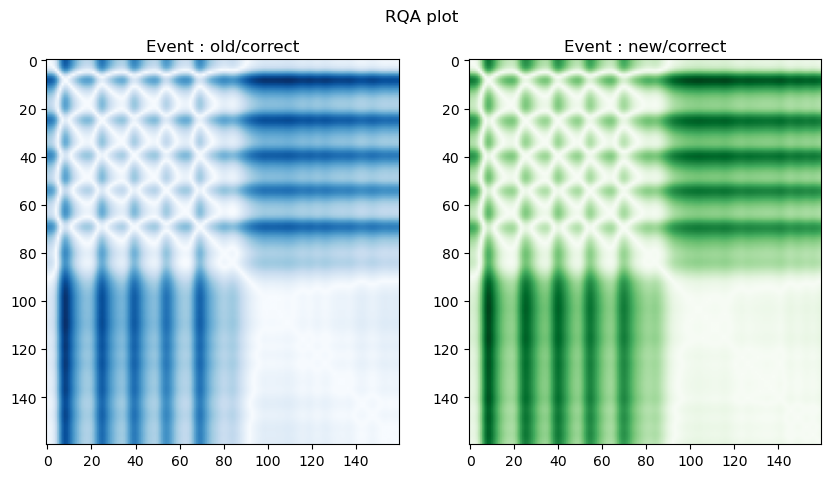

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('RQA plot')
cmap_ev = {0 : 'Blues', 1 : 'Greens'}

for ev_i in range(2) :
    X_1 =  all_trials_transformed[:, ev_i, :,:]
    R, D = recurrence_plot(X_1[:, 0, :].mean(0))

    axs[ev_i].imshow(D, aspect='auto', cmap=cmap_ev[ev_i])
    axs[ev_i].set_title(f'Event : {event[ev_i]}')
   

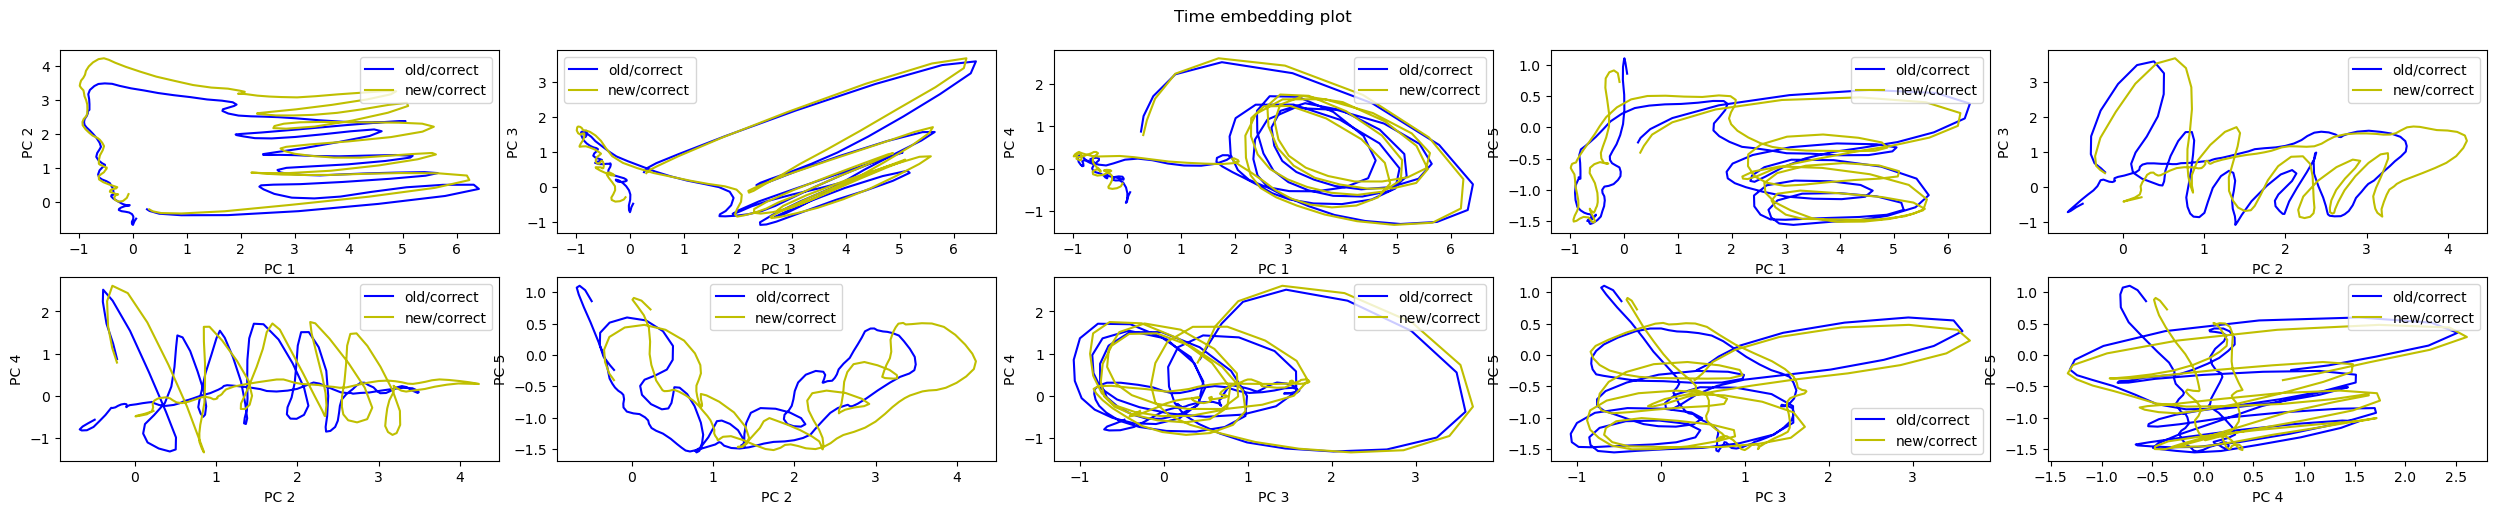

In [ ]:
import itertools
arr = np.arange(5)
combos = list(itertools.combinations(arr, 2))
fig, axs = plt.subplots(2, int(len(combos)/2), figsize = (5*int(len(combos)/2), 5))
fig.suptitle('Time embedding plot')
fig.tight_layout()

for (x_, y_), ax in zip(combos, axs.flatten()) : 
    for ev_i in range(2) :
        X_1 =  all_trials_transformed[:, ev_i, :,:]
        ax.plot(X_1[:, x_, :].mean(axis=0), X_1[:, y_, :].mean(axis = 0) , c = color_ev[ev_i], label = event[ev_i])
    ax.set_ylabel(f'PC {y_ +1}')
    ax.set_xlabel(f'PC {x_ +1}')
    ax.legend()
